<a href="https://colab.research.google.com/github/abhijeet349/brain-tumer/blob/main/Final_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from keras.layers.normalization import BatchNormalization # Incorrect import
from tensorflow.keras.layers import BatchNormalization # Correct import
import numpy as np
tf.keras.backend.clear_session()

In [5]:
image_size = [512,512]
data_path = '/content/drive/My Drive/Harvard Medical Dataset2'

In [14]:
#Initial  BLock of the model
ini_input=keras.Input(shape=(512,512,3),name="image")

x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
x1=layers.MaxPooling2D((4,4))(x1)
x1=layers.BatchNormalization()(x1)

x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
x2=layers.MaxPooling2D((2,2))(x2)
x2=layers.BatchNormalization()(x2)

x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
x3=layers.MaxPooling2D((2,2))(x3)
x3=layers.BatchNormalization()(x3)

x4=layers.Conv2D(512,(3,3),strides=2,padding="same")(x3)
x4=layers.MaxPooling2D((2,2))(x4)
x4=layers.BatchNormalization()(x4)

x5=layers.GlobalAveragePooling2D()(x4)
x5=layers.Activation("relu")(x5)

x6=layers.Dense(1024,"relu")(x5)
x6=layers.BatchNormalization()(x6)
x7=layers.Dense(512,"relu")(x6)
x7=layers.BatchNormalization()(x7)
x8=layers.Dense(256,"relu")(x7)
x8=layers.BatchNormalization()(x8)
x8=layers.Dropout(.2)(x8)
x9=layers.Dense(2)(x8)
pred=layers.Activation("softmax")(x9)

model=keras.Model(inputs=ini_input,outputs=pred)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image (InputLayer)              │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 246, 246, 64)   │        92,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 31, 31, 128)    │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 5,063,362 (19.32 MB)

 Trainable params: 5,057,858 (19.29 MB)

 Non-trainable params: 5,504 (21.50 KB)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    validation_split=0.2)

train_generator=train_datagen.flow_from_directory('/gdrive/MyDrive/Colab Notebooks/Harvard Medical Dataset2/Harvard Medical Dataset2', target_size=(512,512), color_mode='rgb', shuffle=True, subset='training', batch_size=10, class_mode='categorical')
val_generator = train_datagen.flow_from_directory('/gdrive/MyDrive/Colab Notebooks/Harvard Medical Dataset2/Harvard Medical Dataset2', target_size=(512,512), color_mode='rgb', shuffle=True, subset='validation', batch_size=10, class_mode='categorical')

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 122 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [10]:
print(train_generator.n)
print(train_generator.batch_size)
print(242//32)

122
10
7


In [18]:
step_size_train=train_generator.n//train_generator.batch_size

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=step_size_train, epochs=80,  verbose=1, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.5375 - loss: 0.9929 - val_accuracy: 0.5333 - val_loss: 64.3238
Epoch 2/80
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9000 - loss: 0.1756

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.9000 - loss: 0.1756 - val_accuracy: 0.5333 - val_loss: 76.8726
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 684ms/step - accuracy: 0.7148 - loss: 0.9954 - val_accuracy: 0.5333 - val_loss: 88.9119
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.5000 - loss: 1.6650 - val_accuracy: 0.5333 - val_loss: 89.1641
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 715ms/step - accuracy: 0.7390 - loss: 0.8598 - val_accuracy: 0.5333 - val_loss: 91.6126
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.2000 - loss: 1.7820 - val_accuracy: 0.5333 - val_loss: 103.4424
Epoch 7/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 863ms/step - accuracy: 0.6410 - loss: 0.7384 - val_accuracy: 0.5333 - val_loss: 90.4191
Epoch 8/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5000 - loss: 0.8115 - val_accuracy: 0.5333 - val_loss: 85.7655
Epoch 9/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 823ms/step - accuracy: 0.8258 - loss: 0.4482 - val_accuracy: 0.

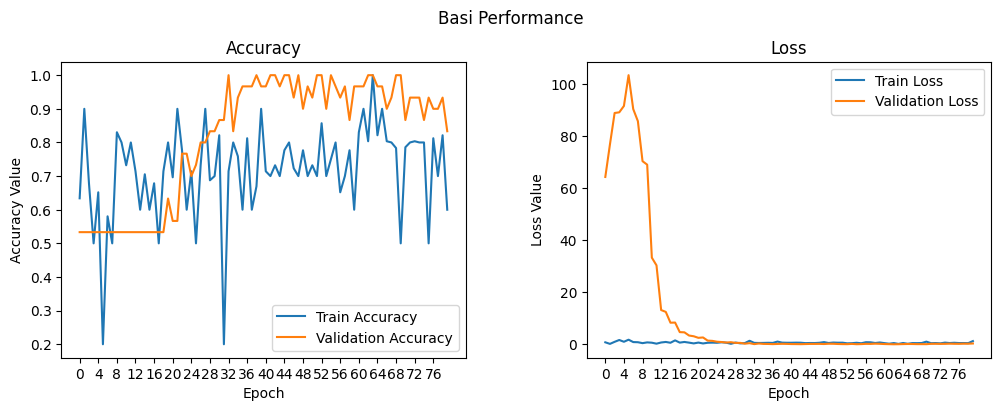

In [19]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basi Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,80))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 80, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 80, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('/content/drive/My Drive/Brain_MRI2/my_bad_model.h5')

In [ ]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basi Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,40))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 40, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 40, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")